 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns

# Set the Path for the csv file
whale_path = Path("./Resources/whale_returns.csv")

# Read CSV and set formatted `Date` column as index
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True) 

# Examine a sample of the data-frame
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Change the name of the columns (personal preference) to eliminate any spaces 
whale_df.columns = ['Soros_Fund_Mgmt', 'Paulson_and_Co', 'Tiger_Global_Mgmt', 'Berkshire_Hathaway']
whale_df.head()

,Soros_Fund_Mgmt,Paulson_and_Co,Tiger_Global_Mgmt,Berkshire_Hathaway
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Examine the dataframe
print(whale_df.dtypes)
print(whale_df.shape)
print(whale_df.describe(include='all'))

Soros_Fund_Mgmt       float64
Paulson_and_Co        float64
Tiger_Global_Mgmt     float64
Berkshire_Hathaway    float64
dtype: object
(1060, 4)
       Soros_Fund_Mgmt  Paulson_and_Co  Tiger_Global_Mgmt  Berkshire_Hathaway
count      1059.000000     1059.000000        1059.000000         1059.000000
mean          0.000179       -0.000203          -0.000081            0.000501
std           0.007842        0.006977           0.010824            0.012831
min          -0.032711       -0.032099          -0.139820           -0.066505
25%          -0.003594       -0.003961          -0.004746           -0.005515
50%           0.000467        0.000000           0.000232            0.000617
75%           0.004292        0.003567           0.005176            0.007516
max           0.042977        0.029338           0.080705            0.061341


In [5]:
# Count nulls
print(f'Number of Null values')
whale_df.isnull().sum()

Number of Null values


Soros_Fund_Mgmt       1
Paulson_and_Co        1
Tiger_Global_Mgmt     1
Berkshire_Hathaway    1
dtype: int64

In [6]:
# Drop nulls
whale_df.dropna(inplace=True)
print(f'\nThe number of Null values after dropping nulls should be zero')
print(whale_df.isnull().sum())
print(whale_df.shape)


The number of Null values after dropping nulls should be zero
Soros_Fund_Mgmt       0
Paulson_and_Co        0
Tiger_Global_Mgmt     0
Berkshire_Hathaway    0
dtype: int64
(1059, 4)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns

# Set the Path for the csv file
algo_path = Path("./Resources/algo_returns.csv")

# Read CSV and set formatted `Date` column as index
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Examine a sample of the data-frame
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Change the name of the columns (personal preference) to eliminate any spaces
algo_df.columns = ['Algo_1', 'Algo_2']
algo_df.head()

,Algo_1,Algo_2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Examine the dataframe
print(algo_df.dtypes)
print(algo_df.shape)
print(algo_df.describe(include='all'))

Algo_1    float64
Algo_2    float64
dtype: object
(1241, 2)
            Algo_1       Algo_2
count  1241.000000  1235.000000
mean      0.000667     0.000341
std       0.007972     0.008466
min      -0.030951    -0.036937
25%      -0.003238    -0.003733
50%       0.000135     0.000581
75%       0.003978     0.005194
max       0.098246     0.083734


In [10]:
# Count nulls
print(f'Number of Null values')
algo_df.isnull().sum()

Number of Null values


Algo_1    0
Algo_2    6
dtype: int64

In [11]:
# Drop nulls
algo_df.dropna(inplace=True)
print(f'\nThe number of Null values after dropping nulls should be zero')
print(algo_df.isnull().sum())
print(algo_df.shape)


The number of Null values after dropping nulls should be zero
Algo_1    0
Algo_2    0
dtype: int64
(1235, 2)


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P TSX 60 Closing Prices

# Set the Path for the csv file
sp_tsx_path = Path("./Resources/sp_tsx_history.csv")

# Read CSV and set formatted `Date` column as index
sp_tsx_df = pd.read_csv(sp_tsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True) 

# Examine a sample of the data-frame
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [13]:
# Examine the dataframe a bit more
print(sp_tsx_df.shape)
print(sp_tsx_df.describe(include='all'))

(1818, 1)
             Close
count         1818
unique        1814
top     $16,074.30
freq             2


In [14]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [15]:
# Fix Data Types

# Remove `$` sign to allow conversion
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')
# Remove `,` (thousand separator) to allow conversion
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '')

# Convert to float
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype('float')

print(sp_tsx_df.dtypes)
sp_tsx_df.head()

Close    float64
dtype: object


/Users/vhurtado/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [16]:
# Calculate Daily Returns
sp_returns_df = sp_tsx_df.pct_change()
sp_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [17]:
# Drop nulls
print(f'Number of Null values')
print(sp_returns_df.isnull().sum())
sp_returns_df.dropna(inplace=True)
print(f'\nThe number of Null values after dropping nulls should be zero')
print(sp_returns_df.isnull().sum())

Number of Null values
Close    1
dtype: int64

The number of Null values after dropping nulls should be zero
Close    0
dtype: int64


In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns_df.columns = ['SP_TSX_60']
sp_returns_df.head()

,SP_TSX_60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_df, algo_df, sp_returns_df], axis="columns", join="inner")
combined_returns_df.head()

,Soros_Fund_Mgmt,Paulson_and_Co,Tiger_Global_Mgmt,Berkshire_Hathaway,Algo_1,Algo_2,SP_TSX_60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

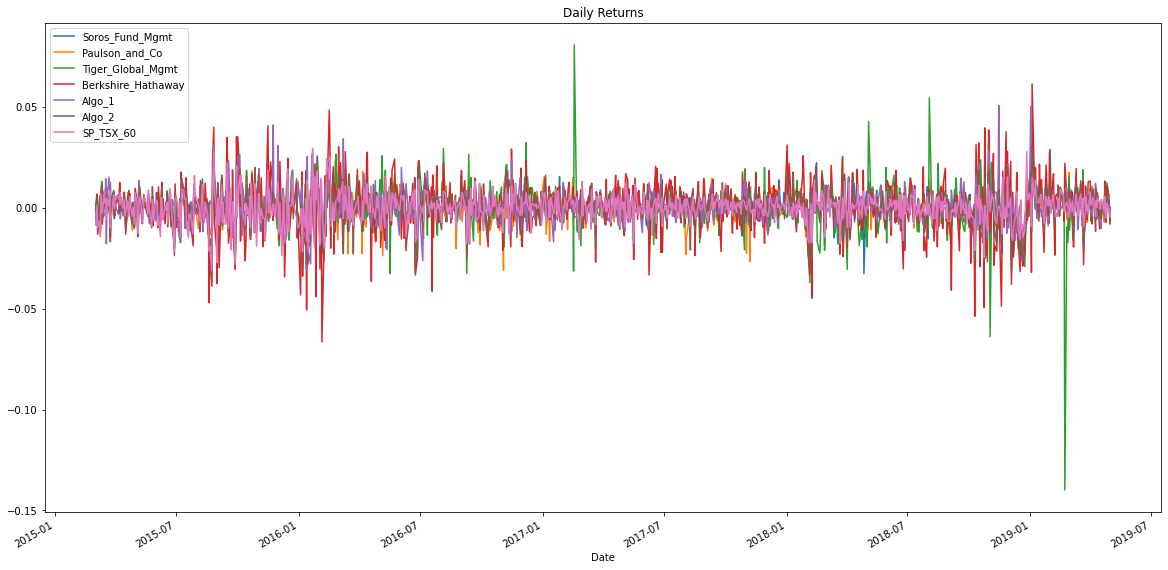

In [20]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(20,10), title='Daily Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

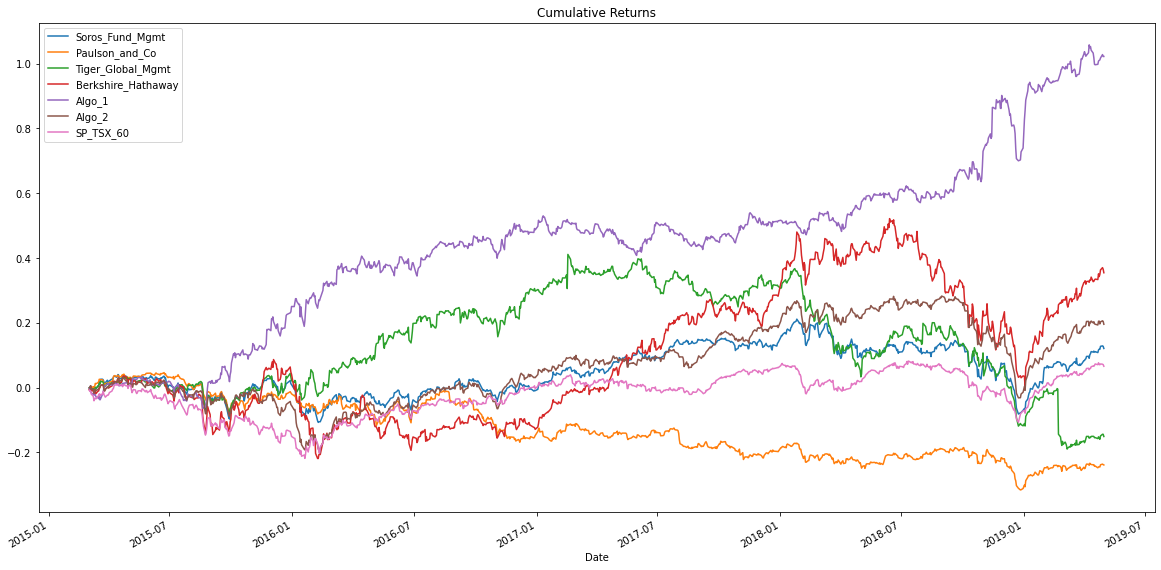

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns_df).cumprod() - 1 # $1 investment
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

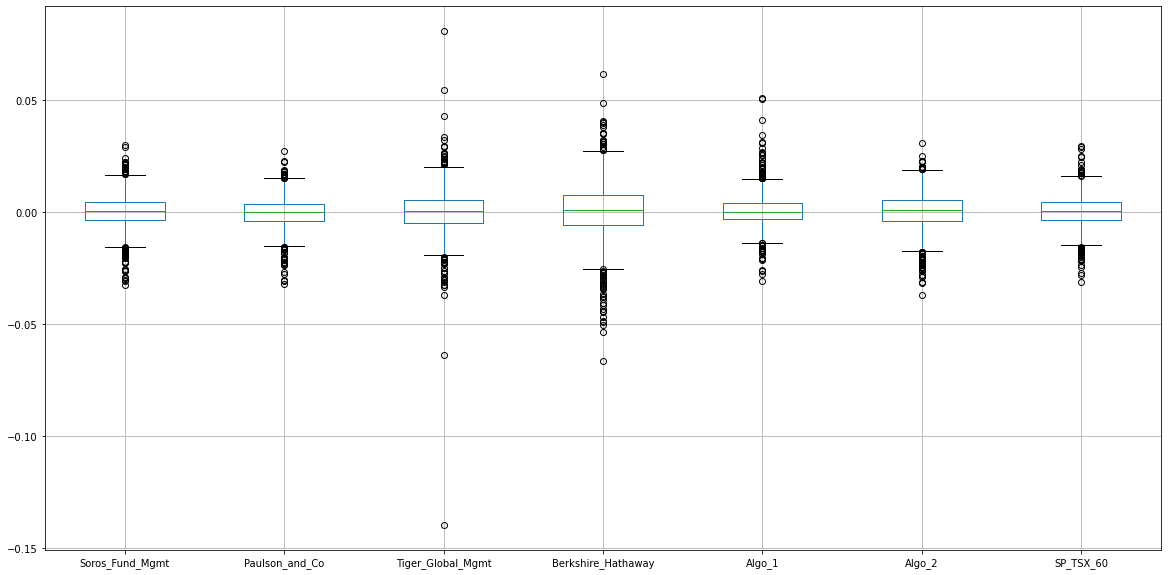

In [22]:
# Box plot to visually show risk
combined_returns_df.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns_df.std()
daily_std

Soros_Fund_Mgmt       0.007828
Paulson_and_Co        0.006982
Tiger_Global_Mgmt     0.010883
Berkshire_Hathaway    0.012826
Algo_1                0.007589
Algo_2                0.008326
SP_TSX_60             0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60
sp500_std = daily_std['SP_TSX_60']
print(f'The daily standard deviation of S&P TSX 60 is: {sp500_std}')

# Determine which portfolios are riskier than the S&P TSX 60
daily_std.sort_values(ascending=False)

#@ToDo: All portfolios with risk std higher than sp500_std

The daily standard deviation of S&P TSX 60 is: 0.007034167748577725


Berkshire_Hathaway    0.012826
Tiger_Global_Mgmt     0.010883
Algo_2                0.008326
Soros_Fund_Mgmt       0.007828
Algo_1                0.007589
SP_TSX_60             0.007034
Paulson_and_Co        0.006982
dtype: float64

### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = daily_std * np.sqrt(252)
annualised_std

Soros_Fund_Mgmt       0.124259
Paulson_and_Co        0.110841
Tiger_Global_Mgmt     0.172759
Berkshire_Hathaway    0.203599
Algo_1                0.120470
Algo_2                0.132177
SP_TSX_60             0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

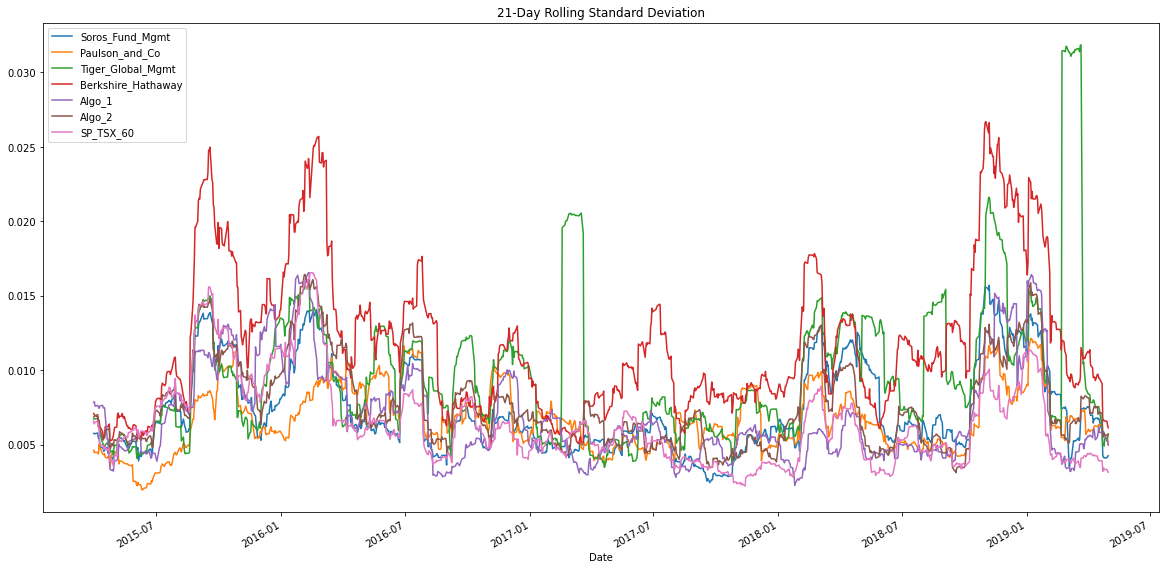

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_std = combined_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_21_std.plot(figsize=(20, 10), title='21-Day Rolling Standard Deviation')

### Calculate and plot the correlation

<AxesSubplot:>

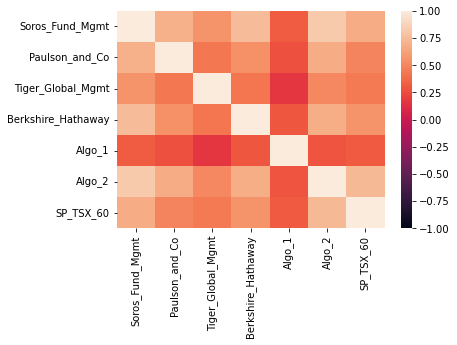

In [27]:
# Calculate the correlation
correlation = combined_returns_df.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

The covariance of "Berkshire Hathaway" returns vs "S&P TSX 60" returns is: 5.027336077110012e-05
The variance of "S&P TSX 60" returns is: 4.9479515915131015e-05
The Beta of "Berkshire Hathaway" returns is: 1.0160439091063609


<AxesSubplot:title={'center':'30-Day Beta trend of "Berkshire Hathaway"'}, xlabel='Date'>

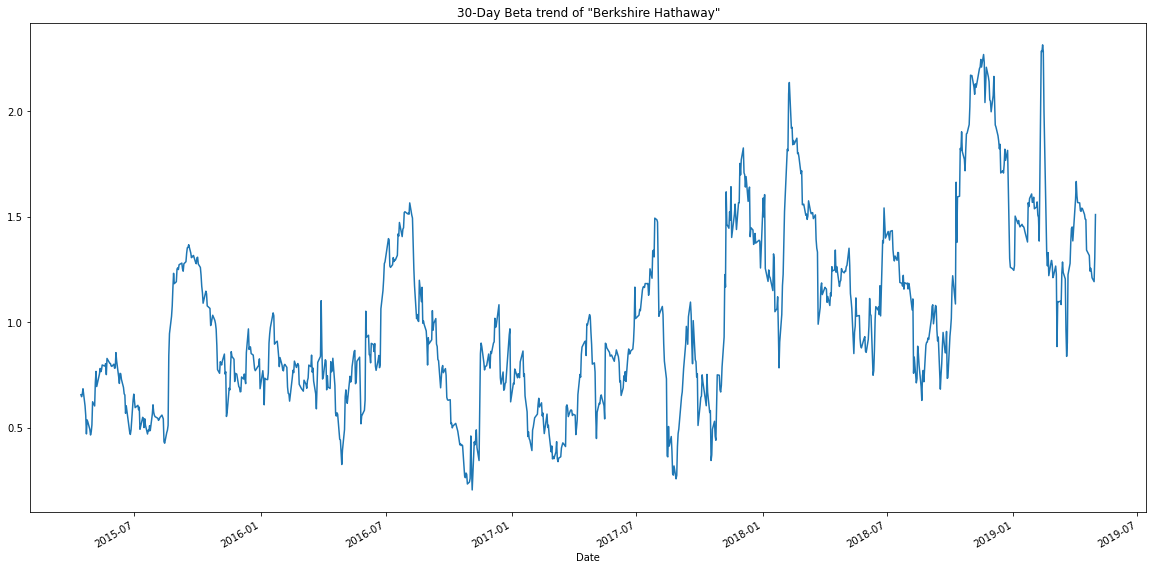

In [28]:
# Calculate covariance of a single portfolio
covariance = combined_returns_df['Berkshire_Hathaway'].cov(combined_returns_df['SP_TSX_60'])
print(f'The covariance of "Berkshire Hathaway" returns vs "S&P TSX 60" returns is: {covariance}')

# Calculate variance of S&P TSX
variance = combined_returns_df['SP_TSX_60'].var()
print(f'The variance of "S&P TSX 60" returns is: {variance}')

# Computing beta
beta = covariance / variance
print(f'The Beta of "Berkshire Hathaway" returns is: {beta}')

# Plot beta trend
rolling_covariance = combined_returns_df['Berkshire_Hathaway'].rolling(window=30).cov(combined_returns_df['SP_TSX_60'])
rolling_variance = combined_returns_df['SP_TSX_60'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance

rolling_beta.plot(figsize=(20, 10), title='30-Day Beta trend of "Berkshire Hathaway"')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

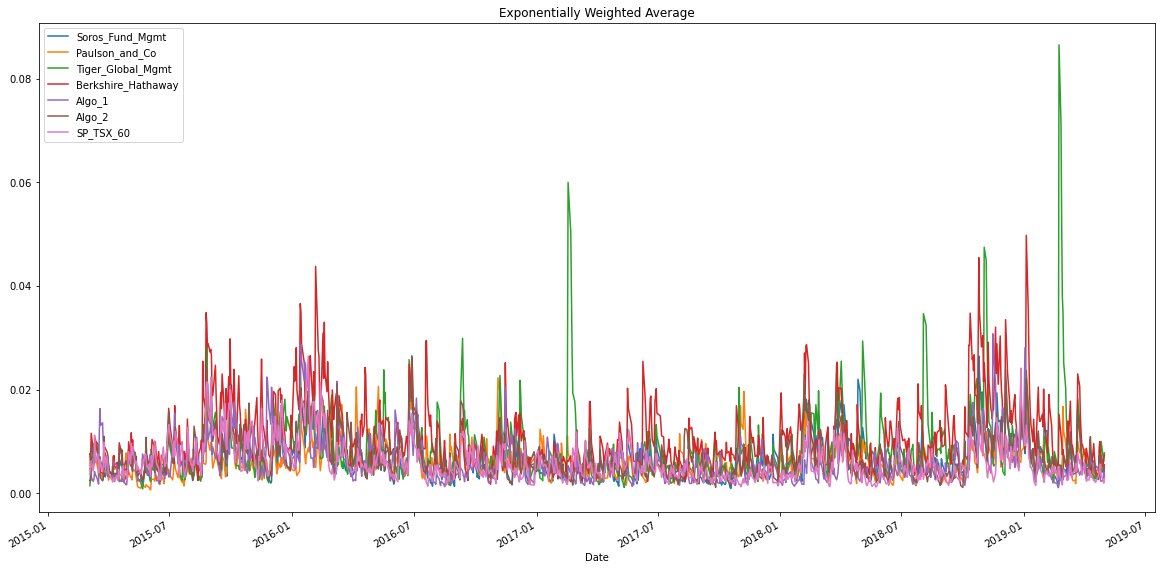

In [29]:
# Use `ewm` to calculate the rolling window
times = combined_returns_df.index
ewa = combined_returns_df.ewm(halflife='21 days', times=pd.DatetimeIndex(times), ignore_na=True).std()
ewa.dropna(inplace=True)
ewa.plot(figsize=(20, 10), title='Exponentially Weighted Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
avg_daily_return = combined_returns_df.mean()
annualised_return = avg_daily_return * 252 # Note: Skipping a Risk Free investment as it was not provided
sharpe_ratios = annualised_return / annualised_std
sharpe_ratios

Soros_Fund_Mgmt       0.286709
Paulson_and_Co       -0.547594
Tiger_Global_Mgmt    -0.144455
Berkshire_Hathaway    0.467045
Algo_1                1.491514
Algo_2                0.396817
SP_TSX_60             0.195550
dtype: float64

<AxesSubplot:title={'center':'Annualised Sharpe Ratios'}>

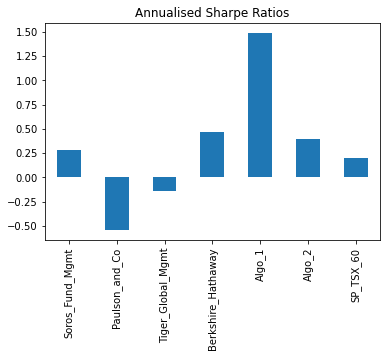

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Annualised Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Reading data from 1st stock


In [33]:
# Reading data from 2nd stock


In [34]:
# Reading data from 3rd stock


In [35]:
# Combine all stocks in a single DataFrame


In [36]:
# Reset Date index


In [37]:
# Reorganize portfolio data by having a column per symbol


In [38]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [43]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [44]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [45]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Calculate Annualized Sharpe Ratios


In [47]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!